# Module 3 Homework - Seaborn
Using a dataset about Pokemon combat statistic, we will practice data visualization using the seaborn library.  
<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this notebook, we will plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fp = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"

## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell :immediately following the plot to describe the relationship between Attack and Defense in this dataset.

### From the plot, I observed....
Results: There is a positive correlation between `Attack` and `Defense`. The hit-points (`HP`) is higher for Pokemons with higher `Attack` and `Defense` values.

Text(0.5, 0.98, 'Attack vs Defense')

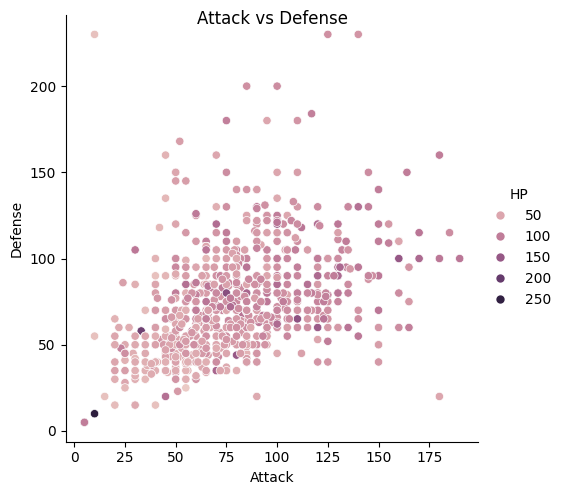

In [4]:
poke = pd.read_csv(fp)
a = sns.relplot(
    data=poke,
    x="Attack",
    y="Defense",
    hue="HP",
    kind="scatter",
)
a.fig.suptitle("Attack vs Defense")

The plot reveals tha in general that as attack rises so does defense. Interesting to note that there are some extreme outliers with extremely high defense or attack and a proportionally low opposing stat. HP values also tend to increase at the high ends of the graph.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

Text(0.5, 0.98, 'Attack vs total for all Pokemon')

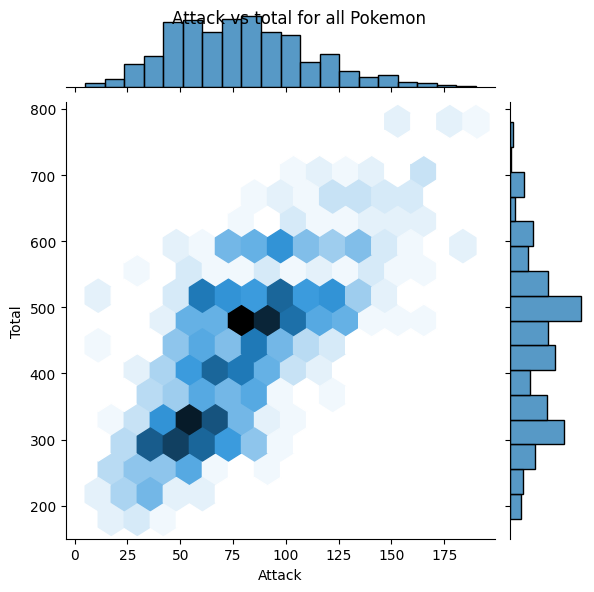

In [5]:
b = sns.jointplot(
    data=poke,
    x="Attack",
    y="Total",
    kind="hex",
    gridsize=15,
)
b.fig.suptitle("Attack vs total for all Pokemon")

From the plot, I observed.... That those with high attack tend to have higher totals, which makes sense, but it also demonstrates the lack of a consistent inverse relationship with attack and other stat totals at large.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

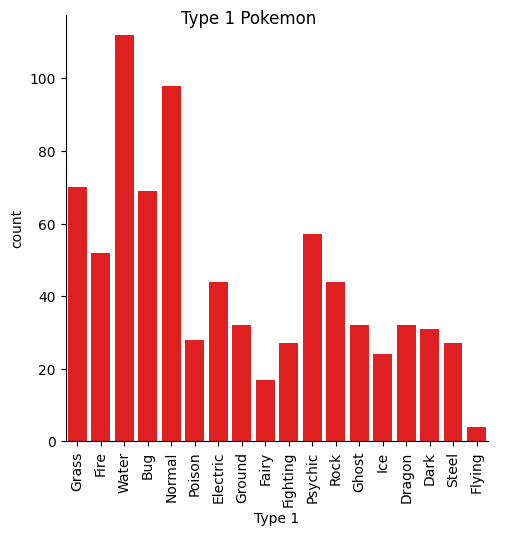

In [6]:
# Your code here . . .
typ1 = sns.catplot(
    data=poke,
    x="Type 1",
    kind="count",
    color="red",
)
typ1.fig.suptitle("Type 1 Pokemon")
typ1.set_xticklabels(rotation=90)

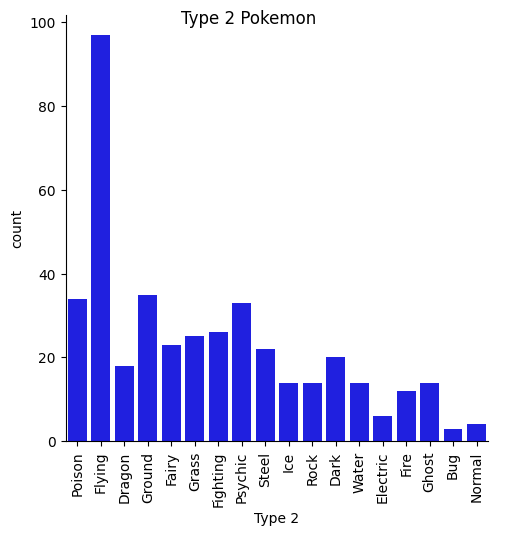

In [7]:
typ2 = sns.catplot(
    data=poke,
    x="Type 2",
    kind="count",
    color="blue",
)
typ2.fig.suptitle("Type 2 Pokemon")
typ2.set_xticklabels(rotation=90)

## Q4-6: Your own question
Come up with three more questions to further explore the pokemon dataset.

Your question(s) . . .

Q4.
Plot a graph with attack and unique types, and determine which type has the highest attack.

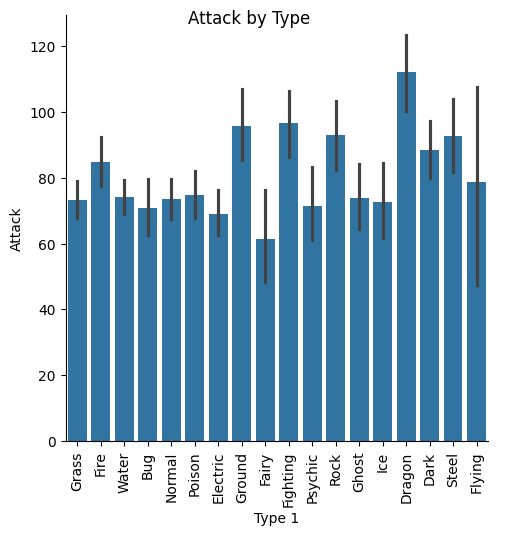

In [8]:
# Your code here . . .
d = sns.catplot(
    data=poke,
    x="Type 1",
    y="Attack",
    kind="bar",
)
d.fig.suptitle("Attack by Type")
d.set_xticklabels(rotation=90)

Dragon type on average has the highest attack and fairy the lowest. This is a considerable disparity.

Q5. Knowing the considerable disparity in attack between Dragon and Fairy type, is it possible that Fairy specializes in another stat and does this stat have an inverse relationship with attack? Create a plot for Sp.Atk and another comparing Sp.Atk to Atk


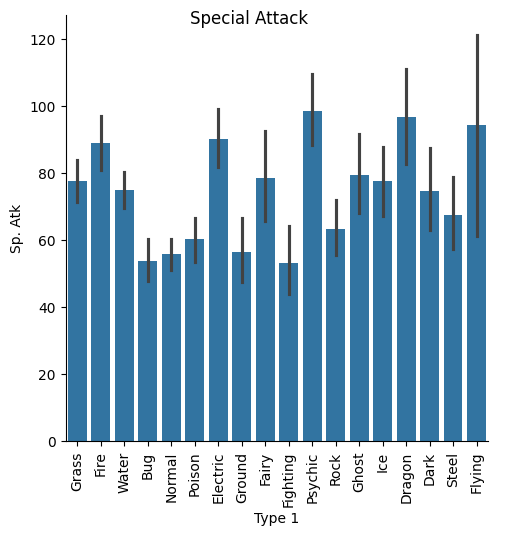

In [ ]:
e = sns.catplot(
    data=poke,
    x="Type 1",
    y="Sp. Atk",
    kind="bar",
)
e.fig.suptitle("Special Attack")
e.set_xticklabels(rotation=90)

Text(0.5, 0.98, 'Attack vs Special Attack')

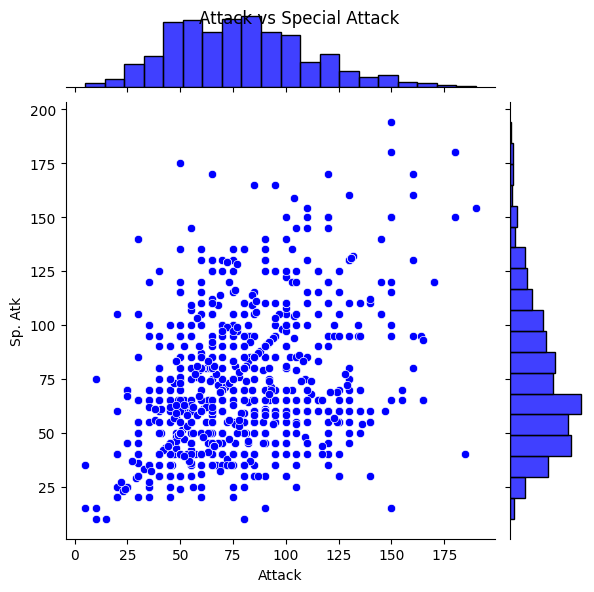

In [10]:
f = sns.jointplot(
    data=poke,
    x="Attack",
    y="Sp. Atk",
    kind="scatter",
    color="blue",
)
f.fig.suptitle("Attack vs Special Attack")

There does not appear to be a strong inverse relationship between attack and Special Attack. Some minor inverse relationships, but in general High attack characters can also be high in Sp.Atk

Q6. Compare the Stat totals of legendaries vs non legendaries, do legendaries have a higher stat total on average?

Text(0.5, 0.98, 'Total Stats Distribution for Legendary vs. Non-Legendary Pokemon')

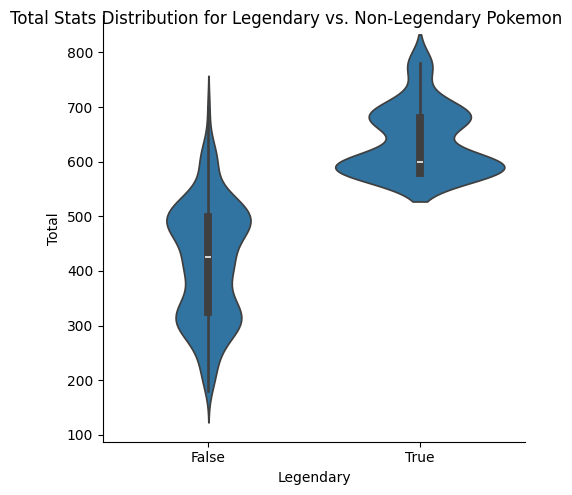

In [11]:
z = sns.catplot(
    data=poke,
    x="Legendary",
    y="Total",
    kind="violin",
)
z.fig.suptitle("Total Stats Distribution for Legendary vs. Non-Legendary Pokemon")

Legendaries by a significant margin have a higher stat total than the majority of regular pokemon with only a select few matching the median legendary stat total.